In [ ]:
#Thư viện dùng để làm việc với dữ liệu dạng bảng
import pandas as pd
#Thư viện dùng để làm việc với dữ liệu dạng số
import numpy as ny
#Thư viện dùng để vẽ những biểu đồ thống kê nâng cấp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Đọc và hiển thị 10 dòng đầu của bộ dữ liệu
data = pd.read_csv('Hotel Reservations.csv')
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
#Kiểm tra dữ liệu bị khuyết thiếu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#In ra kích thước bộ dữ liệu
data.shape

(36275, 19)

In [ ]:
#Mô tả các giá trị thống kê cơ bản
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


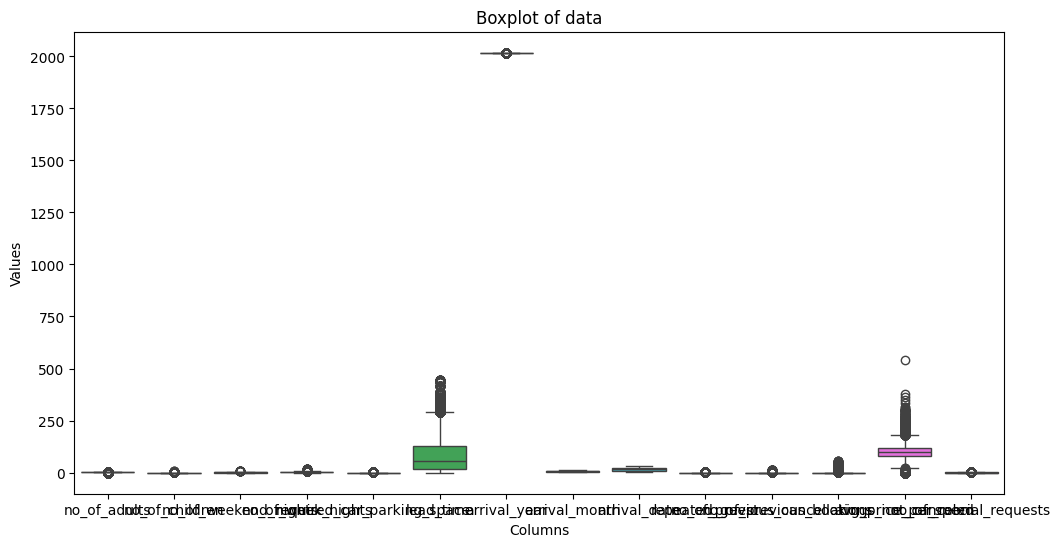

In [ ]:
#Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of data')
plt.show()

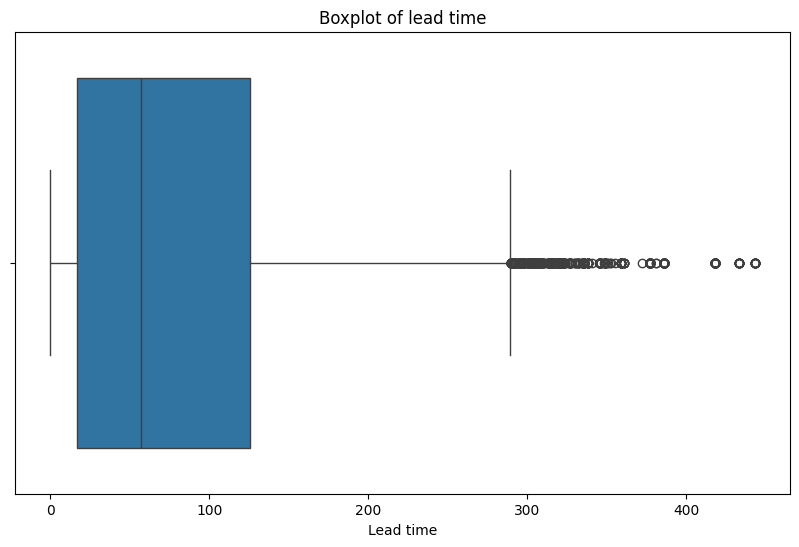

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['lead_time'])
plt.title('Boxplot of lead time')
plt.xlabel('Lead time')
plt.show()

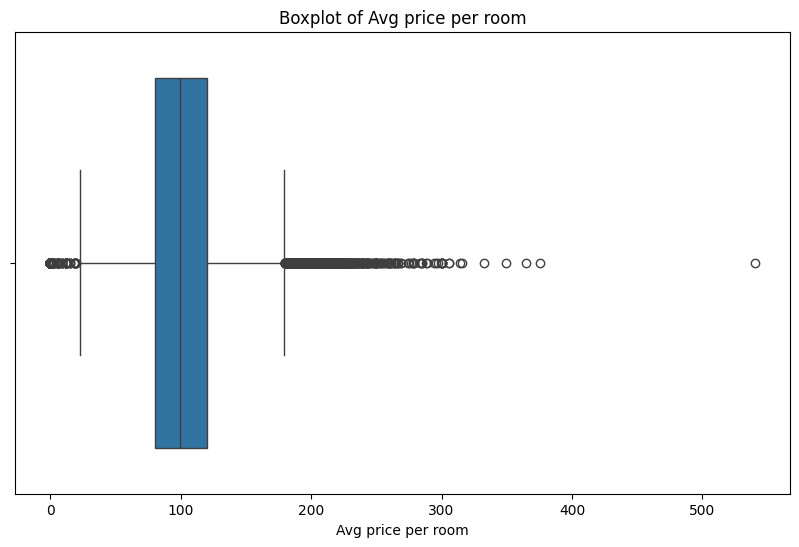

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['avg_price_per_room'])
plt.title('Boxplot of Avg price per room')
plt.xlabel('Avg price per room')
plt.show()

In [ ]:
#Xác định và xóa ngoại lai bằng IQR
#Áp dụng cho 2 cột là Lead time và Avg price per room
column_outliers = ['lead_time','avg_price_per_room']
# Xác định và xử lý các giá trị ngoại lai cho từng cột số
for col in column_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Lọc các giá trị ngoại lai
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')

Number of outliers in lead_time: 1331
Number of outliers in avg_price_per_room: 1696


In [ ]:
    # Loại bỏ các giá trị ngoại lai
    data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]

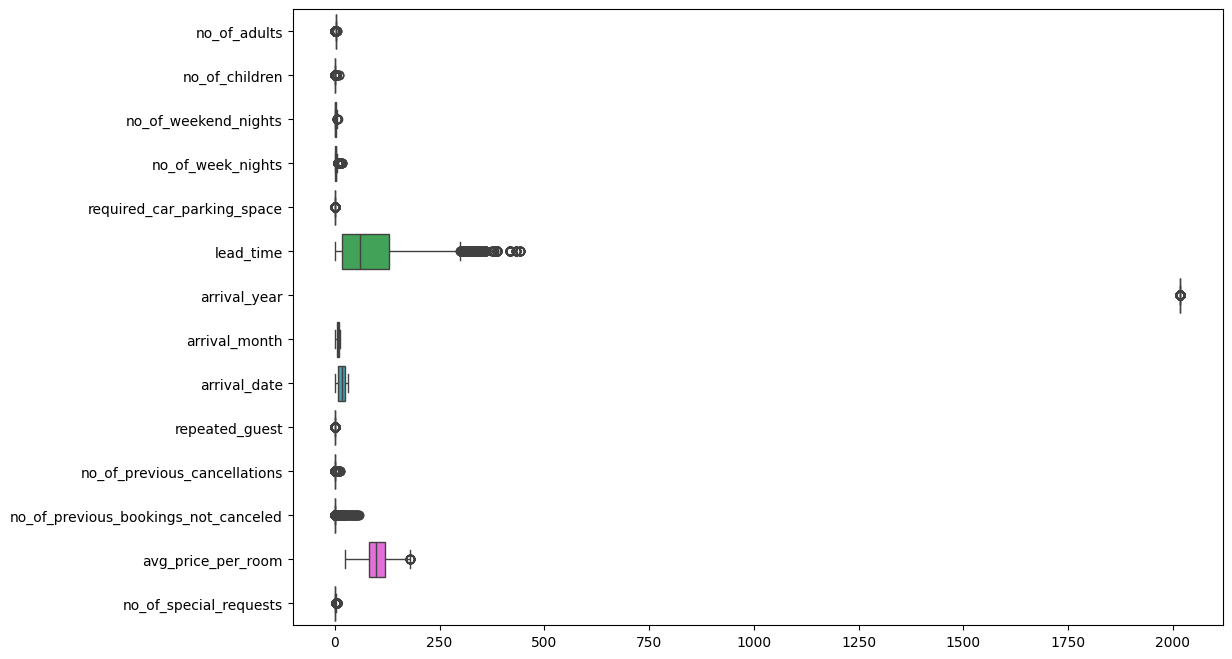

In [ ]:
#Vẽ lại biểu đồ boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.show()

In [ ]:
#In ra kích thước sau khi đã xử lý ngoại lai
data.shape

(34579, 19)

In [ ]:
#Xác định các giá trị duy nhất có trong từng thuộc tính định danh
data['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
data['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2'], dtype=object)

In [ ]:
data['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
data['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
#Mã hóa dữ liệu với LabelEncoder
lb_make = LabelEncoder()
data['room_type_reserved'] = lb_make.fit_transform(data['room_type_reserved'])
data['type_of_meal_plan'] = lb_make.fit_transform(data['type_of_meal_plan'])
data['market_segment_type'] = lb_make.fit_transform(data['market_segment_type'])
data['booking_status'] = lb_make.fit_transform(data['booking_status'])
data['avg_price_per_room'] = lb_make.fit_transform(data['avg_price_per_room'])
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,324,0,1
1,1,2,0,2,3,2,0,0,5,2018,11,6,4,0,0,0,1893,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,219,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,1626,0,0
4,4,2,0,1,1,2,0,0,48,2018,4,11,4,0,0,0,1416,0,0
5,5,2,0,0,2,1,0,0,346,2018,9,13,4,0,0,0,2187,1,0
6,6,2,0,1,3,0,0,0,34,2017,10,15,4,0,0,0,1922,1,1
7,7,2,0,1,3,0,0,3,83,2018,12,26,4,0,0,0,1850,1,1
8,8,3,0,0,4,0,0,0,121,2018,7,6,3,0,0,0,1513,1,1
9,9,2,0,0,5,0,0,3,44,2018,10,18,4,0,0,0,2729,3,1


In [ ]:
#Dữ liệu sau khi đã mã hóa
data['room_type_reserved']

0        0
1        0
2        0
3        0
4        0
        ..
36270    3
36271    0
36272    0
36273    0
36274    0
Name: room_type_reserved, Length: 34579, dtype: int64

In [ ]:
data['type_of_meal_plan']

0        0
1        2
2        0
3        0
4        2
        ..
36270    0
36271    0
36272    0
36273    2
36274    0
Name: type_of_meal_plan, Length: 34579, dtype: int64

In [ ]:
data['market_segment_type']

0        3
1        4
2        4
3        4
4        4
        ..
36270    4
36271    4
36272    4
36273    4
36274    3
Name: market_segment_type, Length: 34579, dtype: int64

In [ ]:
data['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 34579, dtype: int64

In [ ]:
data=data.drop(columns=['Booking_ID'])

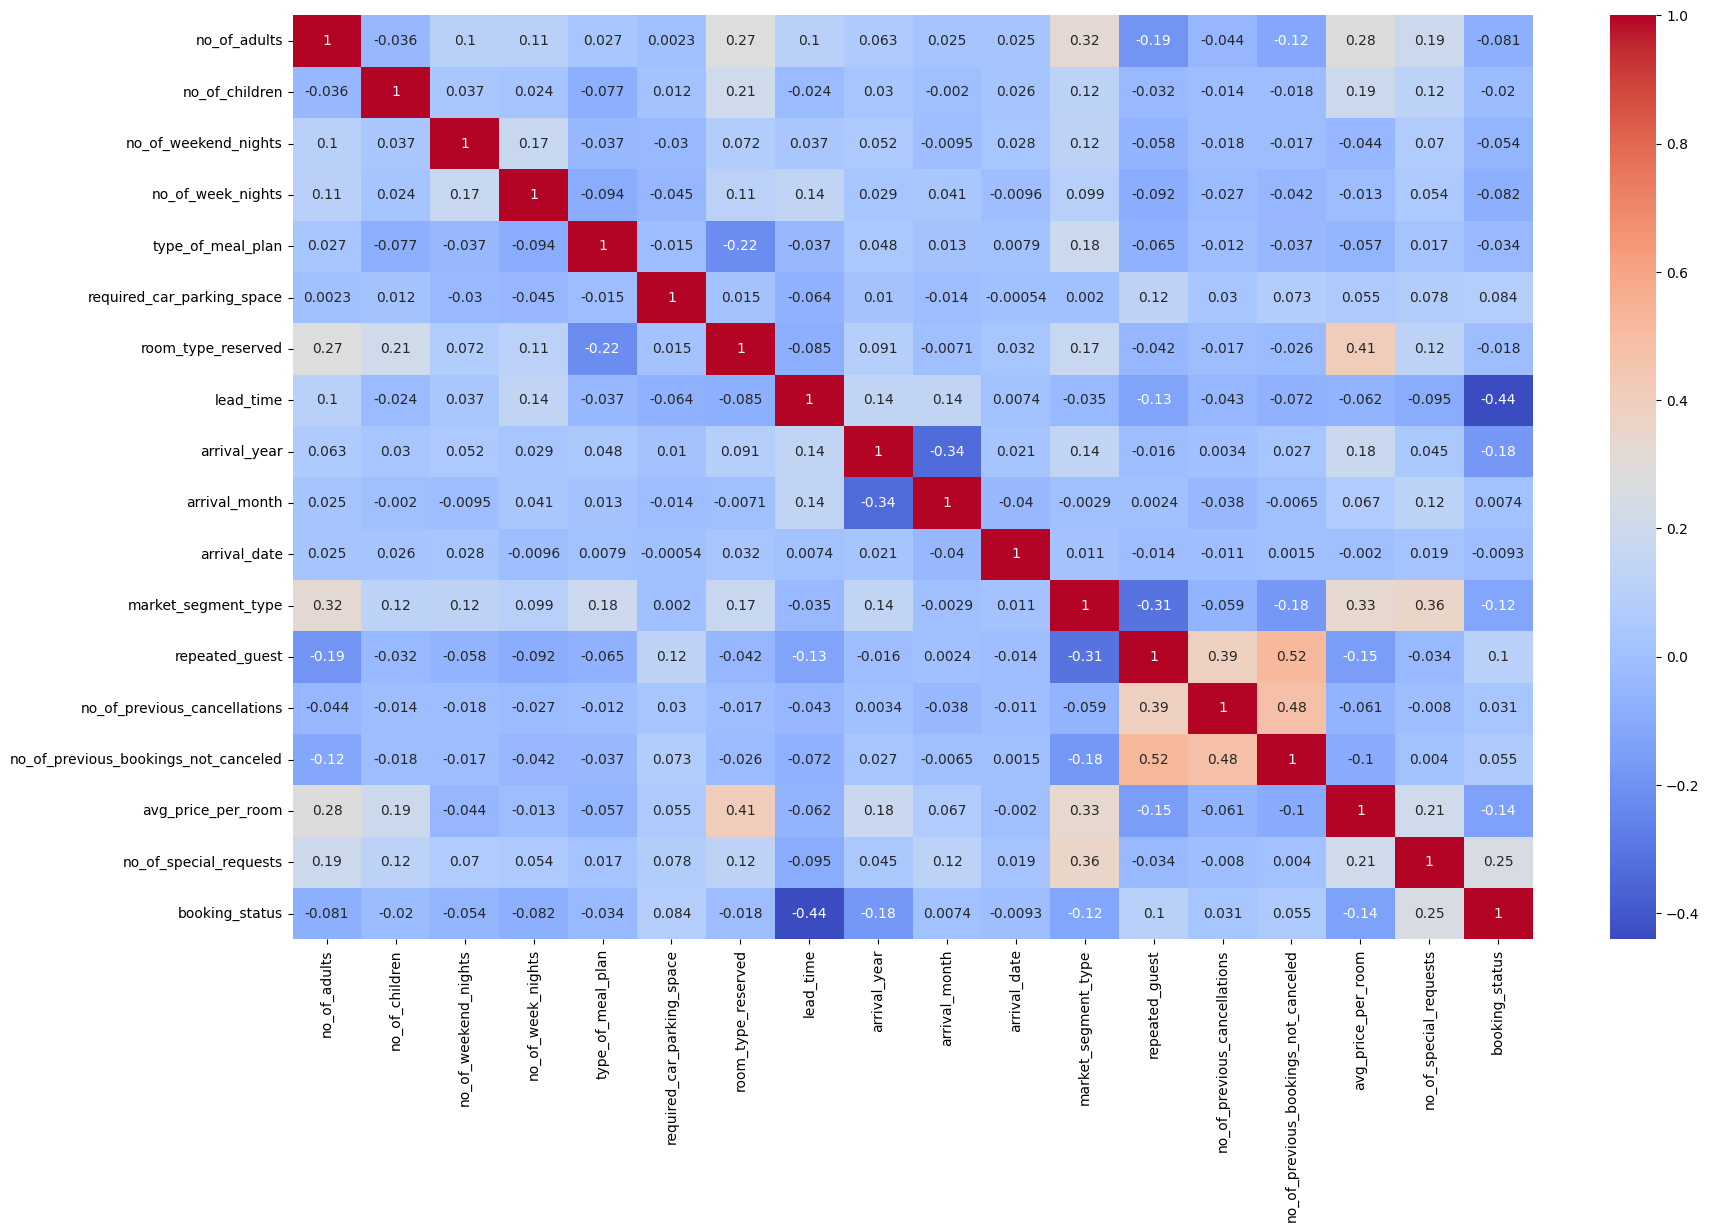

In [ ]:
#Vẽ biểu đồ nhiệt thể hiện mối quan hệ tương quan giữa các thuộc tính
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Khai báo thư viện
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Xác định các thuộc tính mô tả và thuộc tính dự đoán
features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
target = ['booking_status']
X = data[features]
y = data[target]
print(X)
print(y)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       type_of_meal_plan  required_car_

In [ ]:
#Chia bộ dữ liệu thành 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
4525              3               0                     2                  3   
32659             2               0                     0                  2   
12399             3               0                     0                  3   
24393             2               0                     2                  5   
32793             1               0                     0                  3   
...             ...             ...                   ...                ...   
383               2               0                     2                  0   
17320             2               2                     0                  1   
3169              2               0                     0                  3   
3512              2               0                     0                  1   
8587              2               0                     1                  3   

       type_of_meal_plan  required_car_

In [ ]:
#Khai báo cây quyết định với criterion = "entropy", max_depth = 3, min_samples_leaf=5
model= tree.DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
#Thực thi mô hình
model = model.fit(X_train, y_train)
#Biểu diễn cây quyết định
print(tree.export_text(model, show_weights=True))

|--- feature_7 <= 151.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_11 <= 3.50
|   |   |   |--- weights: [893.00, 5123.00] class: 1
|   |   |--- feature_11 >  3.50
|   |   |   |--- weights: [2946.00, 2683.00] class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_16 <= 1.50
|   |   |   |--- weights: [1121.00, 6073.00] class: 1
|   |   |--- feature_16 >  1.50
|   |   |   |--- weights: [156.00, 3058.00] class: 1
|--- feature_7 >  151.50
|   |--- feature_15 <= 1627.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- weights: [1418.00, 757.00] class: 0
|   |   |--- feature_16 >  0.50
|   |   |   |--- weights: [274.00, 682.00] class: 1
|   |--- feature_15 >  1627.50
|   |   |--- feature_9 <= 11.50
|   |   |   |--- weights: [2358.00, 34.00] class: 0
|   |   |--- feature_9 >  11.50
|   |   |   |--- weights: [18.00, 69.00] class: 1



[Text(0.5, 0.875, 'x[7] <= 151.5\nentropy = 0.917\nsamples = 27663\nvalue = [9184, 18479]'),
 Text(0.25, 0.625, 'x[16] <= 0.5\nentropy = 0.781\nsamples = 22053\nvalue = [5116, 16937]'),
 Text(0.125, 0.375, 'x[11] <= 3.5\nentropy = 0.915\nsamples = 11645\nvalue = [3839, 7806]'),
 Text(0.0625, 0.125, 'entropy = 0.606\nsamples = 6016\nvalue = [893, 5123]'),
 Text(0.1875, 0.125, 'entropy = 0.998\nsamples = 5629\nvalue = [2946, 2683]'),
 Text(0.375, 0.375, 'x[16] <= 1.5\nentropy = 0.537\nsamples = 10408\nvalue = [1277, 9131]'),
 Text(0.3125, 0.125, 'entropy = 0.624\nsamples = 7194\nvalue = [1121, 6073]'),
 Text(0.4375, 0.125, 'entropy = 0.28\nsamples = 3214\nvalue = [156, 3058]'),
 Text(0.75, 0.625, 'x[15] <= 1627.5\nentropy = 0.848\nsamples = 5610\nvalue = [4068, 1542]'),
 Text(0.625, 0.375, 'x[16] <= 0.5\nentropy = 0.995\nsamples = 3131\nvalue = [1692, 1439]'),
 Text(0.5625, 0.125, 'entropy = 0.932\nsamples = 2175\nvalue = [1418, 757]'),
 Text(0.6875, 0.125, 'entropy = 0.864\nsamples = 95

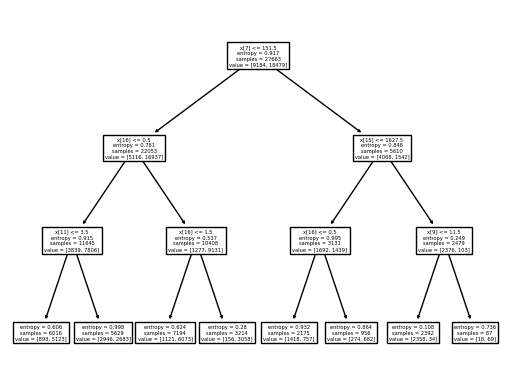

In [ ]:
#Kết quả cây phân lớp
tree.plot_tree(model)

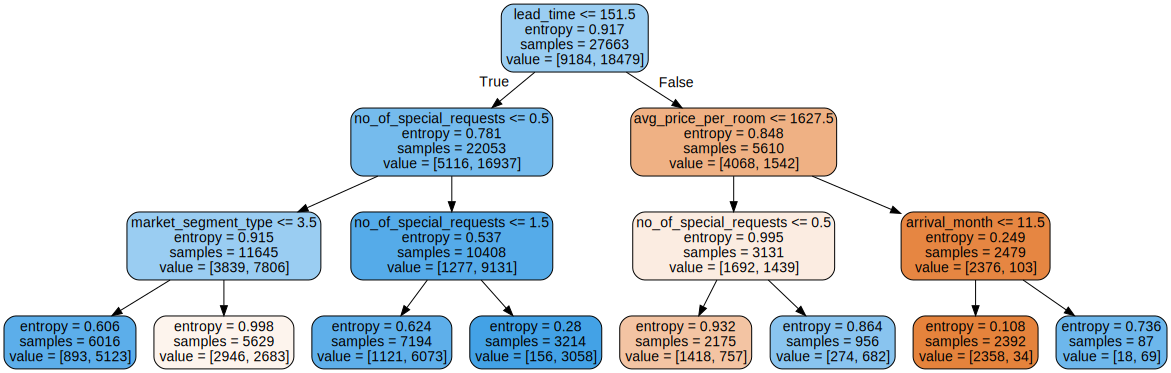

In [ ]:
#Biểu diễn cây quyết định với gói Graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features, filled = True, rounded = True )
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Kiểm thử mô hình
y_pred=model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được: \n", y_pred)

Giá trị nhãn mô hình dự đoán được: 
 [0 1 0 ... 1 1 1]


Confusion Matrix: 
 [[1690  587]
 [ 870 3769]]


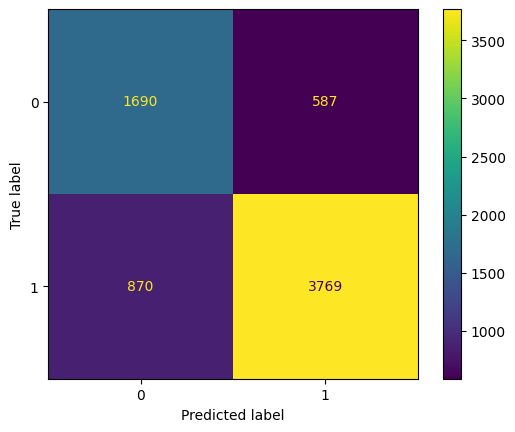

In [ ]:
#Xác định ma trận nhầm lẫn
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot())

In [ ]:
#Độ chính xác của mô hình trên tập test
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  78.93290919606709


In [ ]:
#Thông số đánh giá hiệu suất
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      2277
           1       0.87      0.81      0.84      4639

    accuracy                           0.79      6916
   macro avg       0.76      0.78      0.77      6916
weighted avg       0.80      0.79      0.79      6916



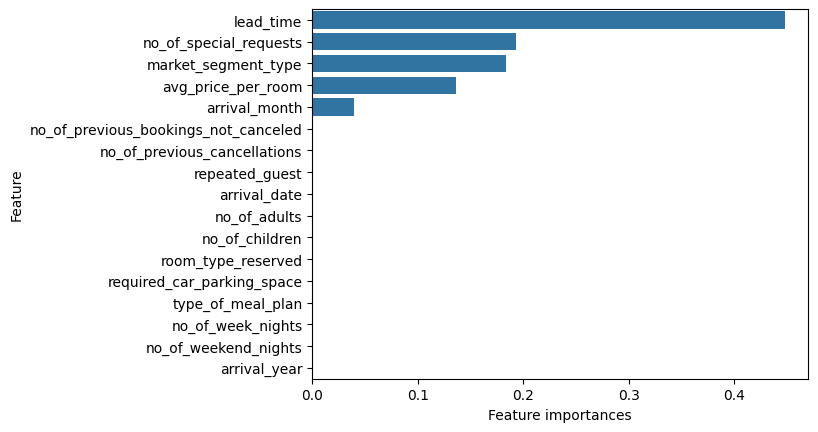

In [ ]:
#Vẽ biểu đồ thể hiện độ quan trọng của các đặc trưng trong cây quyết định
importances = model.feature_importances_
features_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
sns.barplot(x=features_importances, y=features_importances.index)
plt.xlabel('Feature importances')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Sử dụng mô hình dự đoán khả năng hủy đặt phòng của khách hàng có các thông tin sau
#Lead_time, no_of_special_requests, market_segment_type, avg_price_per_room, arrival_month
#no_of_previous_bookings_not_canceled, no_of_previous_cancellations,...
X=[[1,1,2,5,0,0,0,224,3,0,0,0,1138,0,2,10,2015]]
y=model.predict(X)
if y==1:
  print("Khách hàng có khả năng không hủy đặt phòng")
else:
  print("Khách hàng có khả năng hủy đặt phòng")


Khách hàng có khả năng không hủy đặt phòng


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
